# Designing Convolutional Neural Networks with Fashion MNIST

The MNIST database contains 60,000 training images and 10,000 testing images. The training samples consist of a 28 by 28 greyscale image associated with one of 10 labels. 
In the Fashion MNIST dataset: t-shirt/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, and ankle boot. 

This notebook visualizes the dataset and demonstrates the accuracy and loss of various convolutional neural network architecture designs.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [2]:
# Loading in the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Mapping the class labels [noted in Keras doc ]
features = {0:'T-shirt/top', 1:'Trouser', 2:'Pull-over', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle-boot'}
def categorical_feature(x):
    return features[x]

def image_visualization(color):
    for i in range(9):
        plt.imshow(train_images[i],cmap=plt.get_cmap(color))
        plt.title(categorical_feature(train_labels[i]))
        plt.show()

4423680/4422102 [==============================] - 0s 0us/step


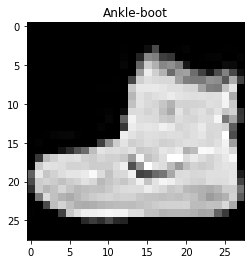

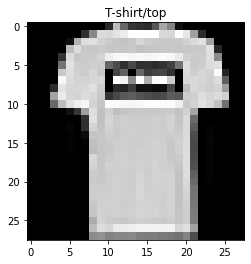

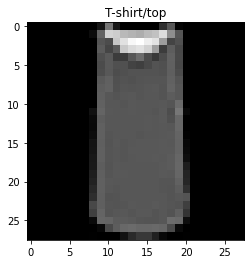

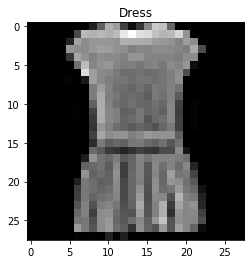

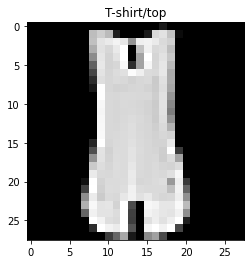

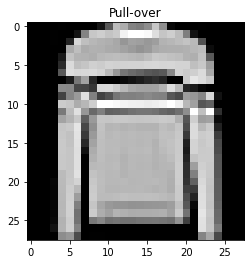

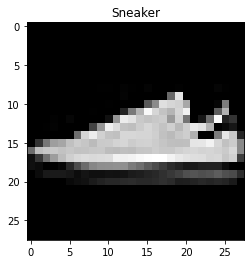

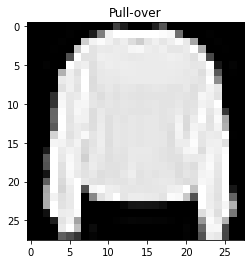

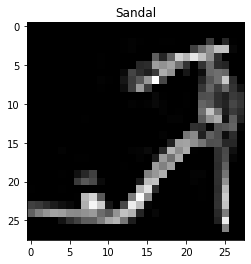

In [3]:
image_visualization('gray')

train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [4]:
# Experimenting with designing convolutional neural network architectures. 
# Convolutional neural network architecture (1)

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_optimizer = Adam(lr=0.001)

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5113 - accuracy: 0.8183
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3871 - accuracy: 0.8599
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8730
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3251 - accuracy: 0.8806
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3087 - accuracy: 0.8872


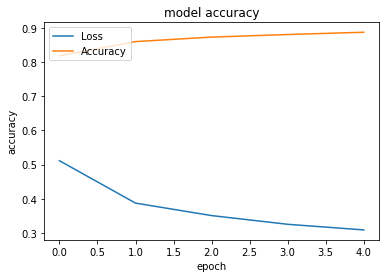

In [5]:
def display_results(model):
    loss_train = model.history['loss']
    loss_val = model.history['accuracy']
    plt.plot(loss_train)
    plt.plot(loss_val)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Loss', 'Accuracy'], loc='upper left')
    return plt.show()

display_results(history)

In [6]:
# Making predictions on the dataset 
# Could also take out the argmax but that'd give the outputs for the neurons and confidence of the cnn in each label. Argmax gives a comprehensible output of model's prediction.

predictions = model.predict(test_images)

def predict(images):
    for i in range(images):
        print("Actual:", categorical_feature(test_labels[i]))
        print("Prediction:", categorical_feature(np.argmax(predictions[i])))
        print ("______")
        print()
        
predict(10)

Actual: Ankle-boot
Prediction: Ankle-boot
______

Actual: Pull-over
Prediction: Pull-over
______

Actual: Trouser
Prediction: Trouser
______

Actual: Trouser
Prediction: Trouser
______

Actual: Shirt
Prediction: Shirt
______

Actual: Trouser
Prediction: Trouser
______

Actual: Coat
Prediction: Coat
______

Actual: Shirt
Prediction: Shirt
______

Actual: Sandal
Prediction: Sandal
______

Actual: Sneaker
Prediction: Sneaker
______



In [7]:
# Convolutional neural network architecture (2)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4216 - accuracy: 0.8494
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3072 - accuracy: 0.8911
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2722 - accuracy: 0.9021
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2485 - accuracy: 0.9090
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2269 - accuracy: 0.9167


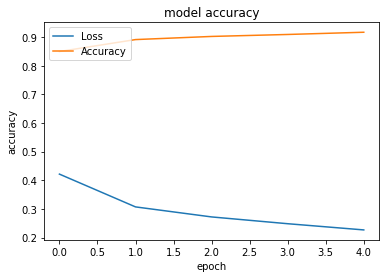

In [8]:
display_results(model)

In [9]:
predict(10)

Actual: Ankle-boot
Prediction: Ankle-boot
______

Actual: Pull-over
Prediction: Pull-over
______

Actual: Trouser
Prediction: Trouser
______

Actual: Trouser
Prediction: Trouser
______

Actual: Shirt
Prediction: Shirt
______

Actual: Trouser
Prediction: Trouser
______

Actual: Coat
Prediction: Coat
______

Actual: Shirt
Prediction: Shirt
______

Actual: Sandal
Prediction: Sandal
______

Actual: Sneaker
Prediction: Sneaker
______



In [10]:
# Convolutional neural network architecture (3)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3 = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5005 - accuracy: 0.8184
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3407 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2974 - accuracy: 0.8927
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2715 - accuracy: 0.9013
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2530 - accuracy: 0.9081


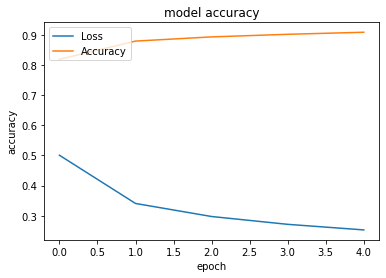

In [11]:
display_results(model3)

In [12]:
predict(10)

Actual: Ankle-boot
Prediction: Ankle-boot
______

Actual: Pull-over
Prediction: Pull-over
______

Actual: Trouser
Prediction: Trouser
______

Actual: Trouser
Prediction: Trouser
______

Actual: Shirt
Prediction: Shirt
______

Actual: Trouser
Prediction: Trouser
______

Actual: Coat
Prediction: Coat
______

Actual: Shirt
Prediction: Shirt
______

Actual: Sandal
Prediction: Sandal
______

Actual: Sneaker
Prediction: Sneaker
______

